In [144]:
# Dependencies
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Splinter set up
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [ ]:
# Website path
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [ ]:
# Create Beautiful Soup object
html = browser.html
soup = bs(html, 'html.parser')

In [36]:
# Scrape website for data rows
results = soup.find_all('tr', class_='data-row')

# Empty lists for each column of data
id = []
terrestrial_date = []
sol = []
ls =[]
month = []
min_temp = []
pressure = []

column = 0

# Iterate through each data row appending lists with data
for x in range(1,8):
    for result in results:
        row = result.find_all('td')
        for cell in row:
            column += 1
            if column == 1:
                id.append(cell.text)
            elif column == 2:
                terrestrial_date.append(cell.text)
            elif column == 3:
                sol.append(cell.text)
            elif column == 4:
                ls.append(cell.text)
            elif column == 5:
                month.append(cell.text)
            elif column == 6:
                min_temp.append(cell.text)
            elif column == 7:
                pressure.append(cell.text)            
        column = 0

['-75.0',
 '-76.0',
 '-76.0',
 '-74.0',
 '-74.0',
 '-78.0',
 '-77.0',
 '-76.0',
 '-74.0',
 '-74.0',
 '-75.0',
 '-75.0',
 '-75.0',
 '-76.0',
 '-75.0',
 '-75.0',
 '-75.0',
 '-74.0',
 '-74.0',
 '-73.0',
 '-73.0',
 '-73.0',
 '-73.0',
 '-73.0',
 '-73.0',
 '-75.0',
 '-75.0',
 '-75.0',
 '-75.0',
 '-74.0',
 '-75.0',
 '-74.0',
 '-74.0',
 '-75.0',
 '-75.0',
 '-74.0',
 '-72.0',
 '-76.0',
 '-74.0',
 '-71.0',
 '-72.0',
 '-74.0',
 '-73.0',
 '-73.0',
 '-74.0',
 '-76.0',
 '-75.0',
 '-72.0',
 '-72.0',
 '-73.0',
 '-74.0',
 '-72.0',
 '-73.0',
 '-73.0',
 '-71.0',
 '-73.0',
 '-72.0',
 '-71.0',
 '-73.0',
 '-70.0',
 '-72.0',
 '-73.0',
 '-73.0',
 '-71.0',
 '-71.0',
 '-73.0',
 '-70.0',
 '-72.0',
 '-72.0',
 '-72.0',
 '-70.0',
 '-71.0',
 '-71.0',
 '-70.0',
 '-70.0',
 '-73.0',
 '-71.0',
 '-74.0',
 '-74.0',
 '-72.0',
 '-70.0',
 '-68.0',
 '-71.0',
 '-68.0',
 '-68.0',
 '-68.0',
 '-66.0',
 '-65.0',
 '-67.0',
 '-66.0',
 '-67.0',
 '-66.0',
 '-66.0',
 '-66.0',
 '-65.0',
 '-64.0',
 '-65.0',
 '-66.0',
 '-65.0',
 '-66.0',


In [49]:
# Create Dataframe from lists
mars_df = pd.DataFrame({"id": id,
                        "terrestrial_date": terrestrial_date,
                        "sol": sol,
                        "ls": ls,
                        "month": month,
                        "min_temp": min_temp,
                        "pressure": pressure})
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [68]:
# Assign datatypes to dataframe columns
mars_df = mars_df.astype({'id': 'int64',
                            'sol': 'int64',
                            'ls': 'int64',
                            'month': 'int64',
                            'min_temp': 'float64',
                            'pressure': 'float64'
                            })
mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date)
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13069 entries, 0 to 13068
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                13069 non-null  int64         
 1   terrestrial_date  13069 non-null  datetime64[ns]
 2   sol               13069 non-null  int64         
 3   ls                13069 non-null  int64         
 4   month             13069 non-null  int64         
 5   min_temp          13069 non-null  float64       
 6   pressure          13069 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 714.8 KB


In [75]:
# Number of months on Mars
num_months = len(mars_df.month.unique())
print(f"There are {num_months} months on Mars")

There are 12 months on Mars


In [77]:
# Number of Martian days worth of data
num_data_days = len(mars_df.sol.unique())
print(f"Data was collected on {num_data_days} separate Martian days")

Data was collected on 1867 separate Martian days


In [159]:
# By average, Coldest and Warmest months on Mars (at Curiosity location)
avg_min_temp = mars_df.groupby('month').mean().min_temp
month_min = [month for month, temp in enumerate(avg_min_temp) if temp == avg_min_temp.min()][0]+1
month_max = [month for month, temp in enumerate(avg_min_temp) if temp == avg_min_temp.max()][0]+1

print(f"The coldest month on Mars at the Curiosity location is month {month_min},\n     with an average temperature of {round(avg_min_temp[month_min],3)} degrees Celsius")
print(f"The warmest month on Mars at the Curiosity location is month {month_max}, \n     with an average temperature of {round(avg_min_temp[month_max],3)} degrees Celsius")


The coldest month on Mars at the Curiosity location is month 3,
     with an average temperature of -83.307 degrees Celsius
The warmest month on Mars at the Curiosity location is month 8, 
     with an average temperature of -68.383 degrees Celsius


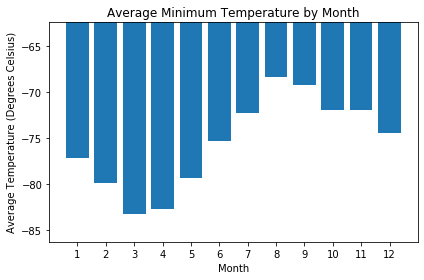

In [156]:
x_axis = np.arange(len(avg_min_temp))+1

plt.bar(x_axis, avg_min_temp)
plt.xticks(x_axis)

plt.title("Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Temperature (Degrees Celsius)")

plt.ylim(min(avg_min_temp)-3,max(avg_min_temp)+6)

plt.tight_layout()
plt.show()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])